<a href="https://colab.research.google.com/github/CarlTeapot/Walmart-Recruiting/blob/main/model_experiment_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
 !pip install mlflow==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 27.5 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found exist

In [1]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from tqdm.notebook import tqdm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

import statsmodels.api as sm

warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'pmdarima'

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"giorgitoronjadze","key":"9c4aebca47b5575e27b4c70560a74ddf"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!pip install opendatasets
!pip install dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 7.5 MB/s eta 0:00:00


In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/overview")

100%|██████████| 2.70M/2.70M [00:00<00:00, 234MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [96]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ML PROEQTI/clean_train_data.csv')

display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Month,Year,Week,Holiday_in_1_week_lag,Weeks_until_next_holiday
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,...,NaN,NaN,211.096358,8.106,Winter,2,2010,5,1.0,1
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,...,NaN,NaN,211.242170,8.106,Winter,2,2010,6,0.0,30
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,...,NaN,NaN,211.289143,8.106,Winter,2,2010,7,0.0,29
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,...,NaN,NaN,211.319643,8.106,Winter,2,2010,8,0.0,28
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,...,NaN,NaN,211.350143,8.106,Spring,3,2010,9,0.0,27


In [91]:
df = df.sort_values(["Store", "Dept", "Date"]).reset_index(drop=True)

In [97]:
df['Date'] = pd.to_datetime(df['Date'])

In [98]:
df.set_index('Date', inplace=True)

df_one = df[(df['Store'] == 1) & (df['Dept'] == 1)]

df_week = df_one.resample('W').sum()

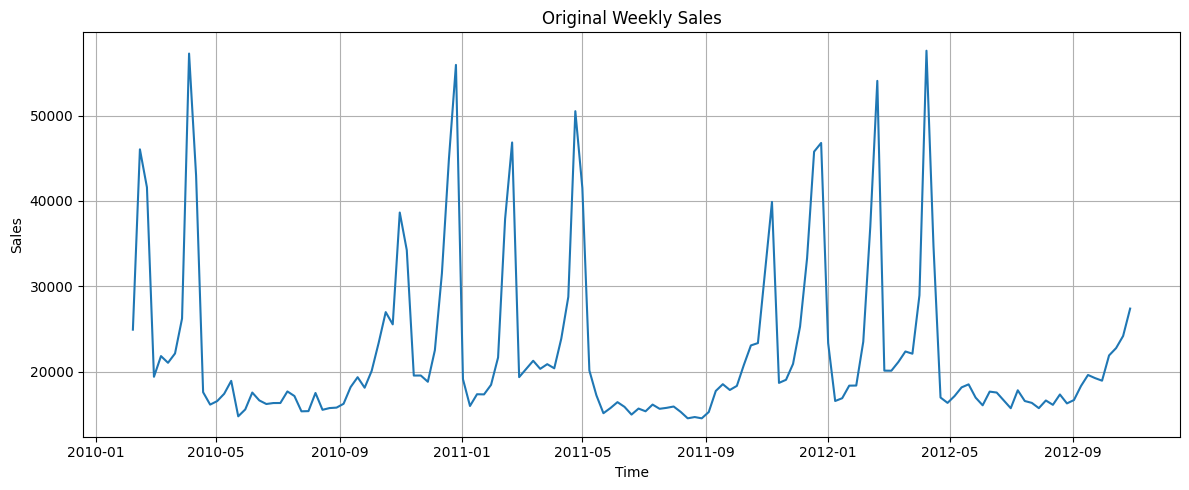

In [99]:
plt.figure(figsize=(12, 5))
plt.plot(df_week['Weekly_Sales'])
plt.title('Original Weekly Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

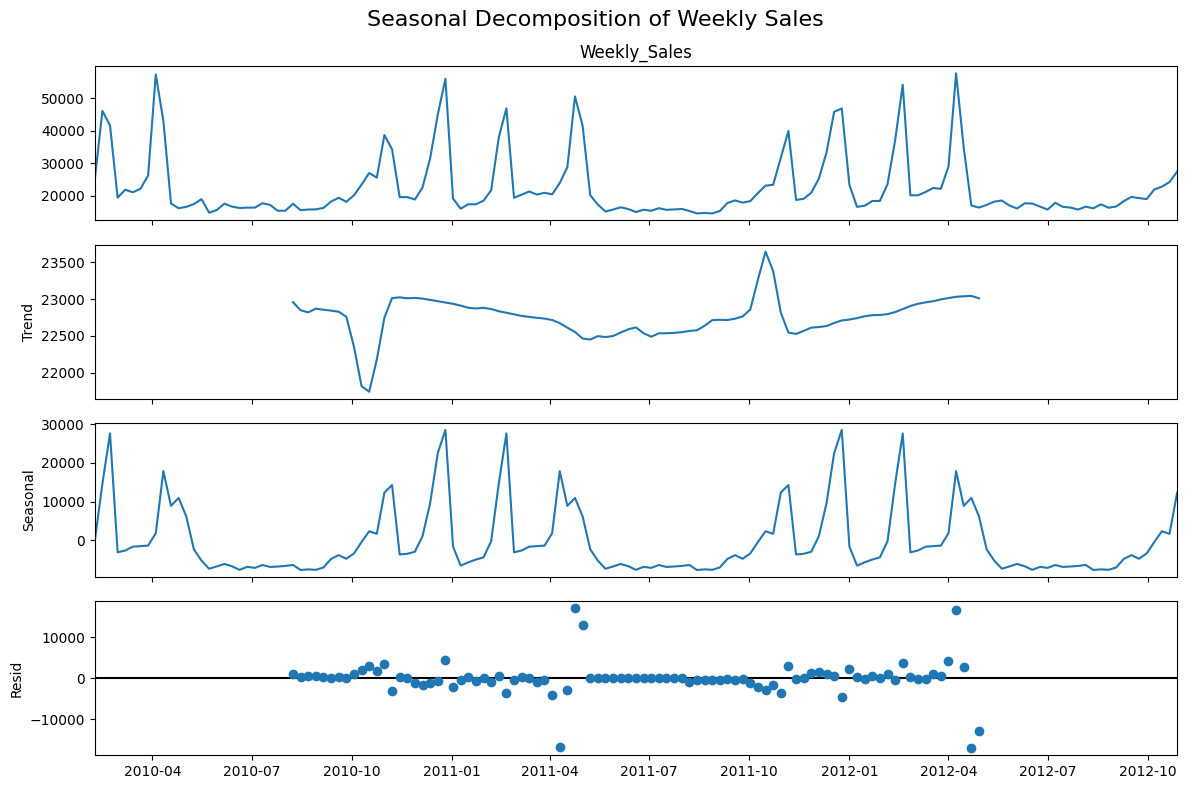

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_week['Weekly_Sales'], model='additive', period=52)  # weekly data, yearly seasonality

fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Seasonal Decomposition of Weekly Sales', fontsize=16)
plt.tight_layout()
plt.show()

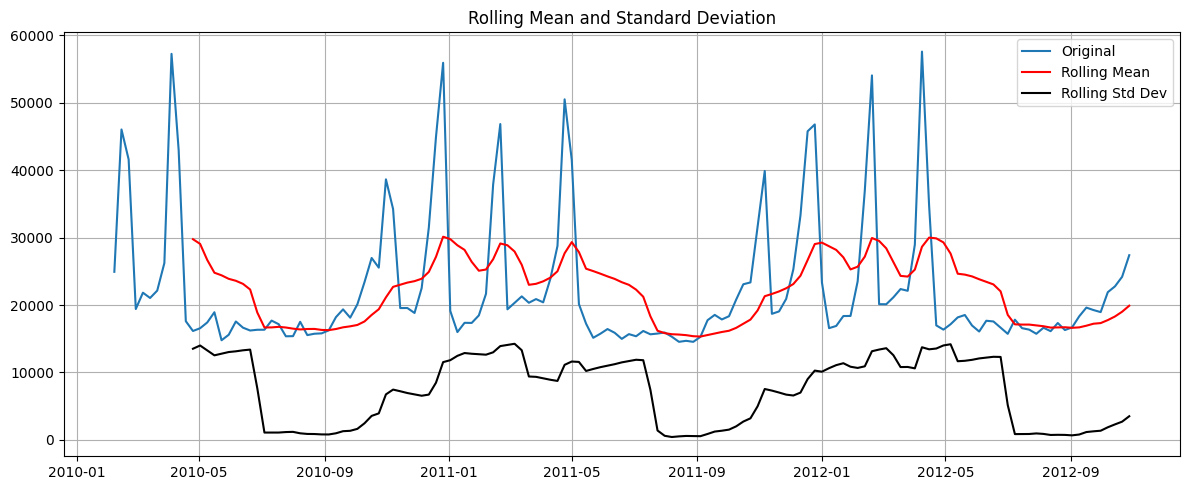

In [101]:
roll_mean = df_week['Weekly_Sales'].rolling(window=12).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=12).std()

plt.figure(figsize=(12, 5))
plt.plot(df_week['Weekly_Sales'], label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Count missing values per markdown column
missing_counts = df[markdown_cols].isna().sum()

# Percentage of missing values per column
missing_percent = df[markdown_cols].isna().mean() * 100

# Basic stats: count, mean, median, min, max
stats = df[markdown_cols].describe().T[['count', 'mean', '50%', 'min', 'max']]
stats.rename(columns={'50%': 'median'}, inplace=True)

print("Missing Values Count per Markdown Column:")
print(missing_counts)
print("\nMissing Values Percentage per Markdown Column:")
print(missing_percent)
print("\nStatistics for Markdown Columns:")
print(stats)


Missing Values Count per Markdown Column:
MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64

Missing Values Percentage per Markdown Column:
MarkDown1    64.257181
MarkDown2    73.611025
MarkDown3    67.480845
MarkDown4    67.984676
MarkDown5    64.079038
dtype: float64

Statistics for Markdown Columns:
              count         mean   median     min        max
MarkDown1  150681.0  7246.420196  5347.45    0.27   88646.76
MarkDown2  111248.0  3334.628621   192.00 -265.76  104519.54
MarkDown3  137091.0  1439.421384    24.60  -29.10  141630.61
MarkDown4  134967.0  3383.168256  1481.31    0.22   67474.85
MarkDown5  151432.0  4628.975079  3359.45  135.16  108519.28


In [49]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

In [48]:

df['Temperature'] = df['Temperature'].fillna(method='ffill').fillna(df['Temperature'].mean())
df['Fuel_Price'] = df['Fuel_Price'].fillna(method='ffill').fillna(df['Fuel_Price'].mean())

/tmp/ipython-input-3800839907.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temperature'] = df['Temperature'].fillna(method='ffill').fillna(df['Temperature'].mean())
/tmp/ipython-input-3800839907.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Fuel_Price'] = df['Fuel_Price'].fillna(method='ffill').fillna(df['Fuel_Price'].mean())


In [50]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Weeks_until_next_holiday', 'Season'],
      dtype='object')


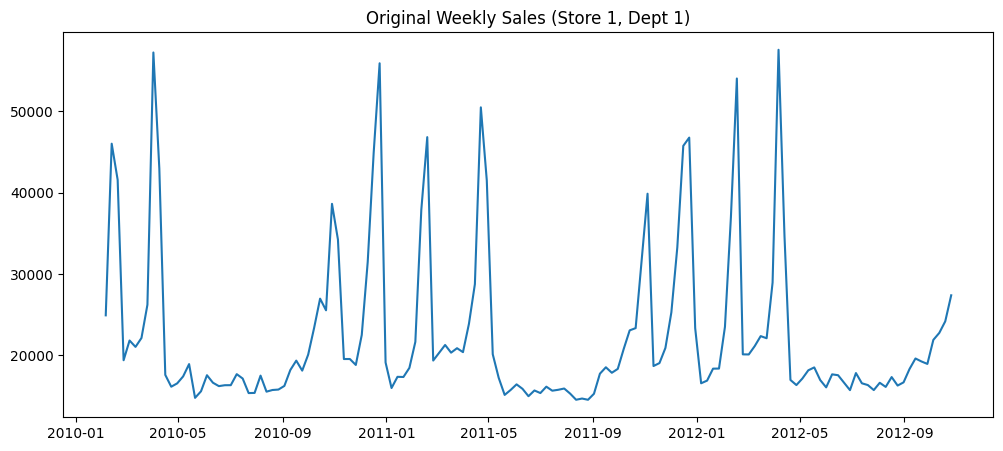

In [51]:
df_sd = df[(df["Store"] == 1) & (df["Dept"] == 1)].copy()
df_sd = df_sd.set_index("Date")
df_sd = df_sd.sort_index()
y = df_sd["Weekly_Sales"]

plt.figure(figsize=(12, 5))
plt.plot(y)
plt.title("Original Weekly Sales (Store 1, Dept 1)")
plt.show()


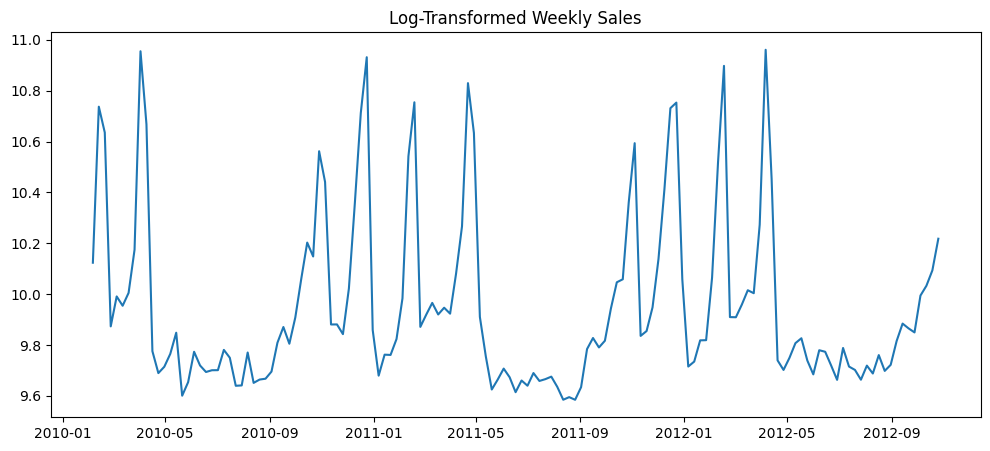

In [52]:
y_log = np.log1p(y)  # log(1 + x) avoids issues with zero sales
plt.figure(figsize=(12, 5))
plt.plot(y_log)
plt.title("Log-Transformed Weekly Sales")
plt.show()

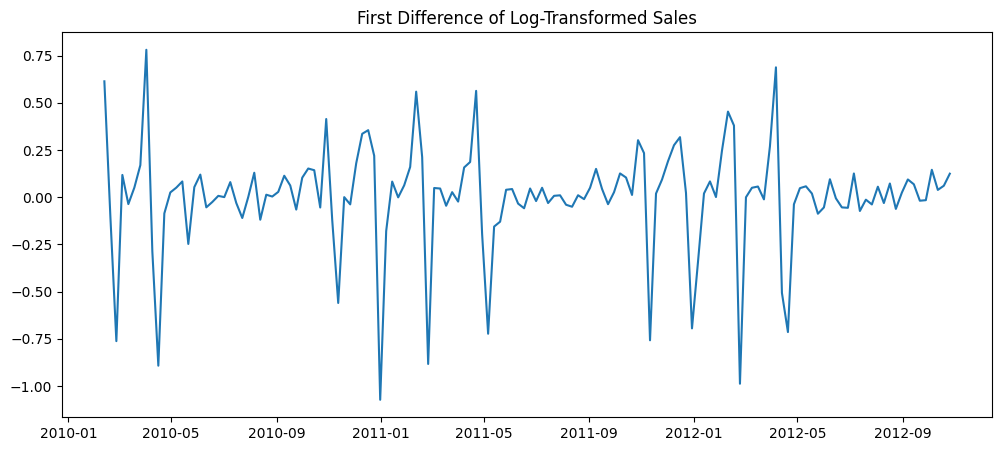

In [53]:
y_log_diff = y_log.diff().dropna()

plt.figure(figsize=(12, 5))
plt.plot(y_log_diff)
plt.title("First Difference of Log-Transformed Sales")
plt.show()

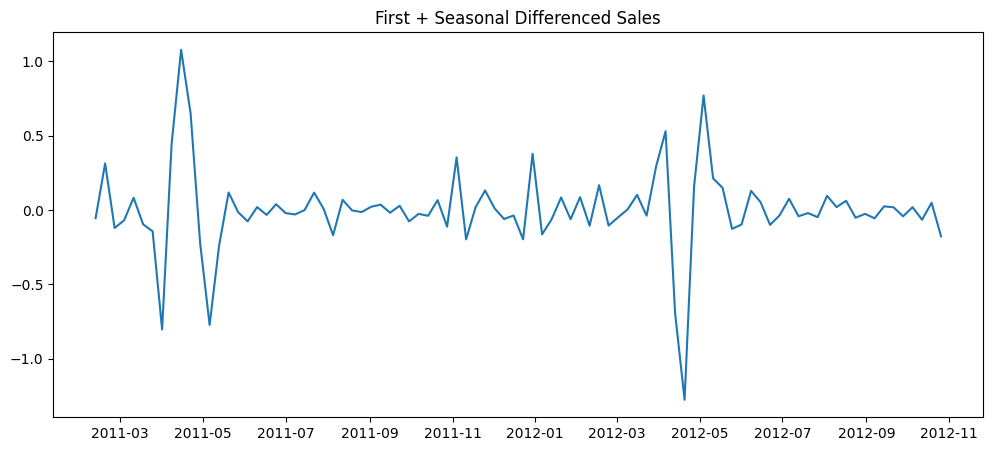

In [54]:
y_log_diff_seasonal = y_log_diff.diff(52).dropna()

plt.figure(figsize=(12, 5))
plt.plot(y_log_diff_seasonal)
plt.title("First + Seasonal Differenced Sales")
plt.show()

In [55]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_log_diff_seasonal.dropna())
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF Statistic: -5.9801
p-value: 0.0000


In [56]:
train = df_sd[df_sd.index < '2012-06-01']
test = df_sd[df_sd.index >= '2012-06-01']

y_train = train["Weekly_Sales"]
y_test = test["Weekly_Sales"]


In [57]:
def weighted_mae(y_true, y_pred, is_holiday):
    weights = np.where(is_holiday == 1, 5, 1)
    error = np.abs(y_true - y_pred)
    wmae = np.sum(weights * error) / np.sum(weights)
    return wmae


In [82]:
# 1. Define exogenous variables other columns that i can use also later to try
# #Temperature', 'Fuel_Price', 'MarkDown1',
#              'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
#              'CPI', 'Unemployment'
exog_cols = ['IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Temperature', 'Season', 'Weeks_until_next_holiday', 'Fuel_Price']

for col in exog_cols:
    df[col] = df[col].fillna(method='ffill').fillna(df[col].mean())

# 2. Log-transform target variable
y_log = np.log1p(train["Weekly_Sales"])
y_log.index = train.index

# 3. Prepare exogenous variables
exog_train = train[exog_cols]
exog_test = test[exog_cols]

# 4. Confirm alignment
assert (y_log.index == exog_train.index).all()

In [77]:
import warnings
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]

warnings.filterwarnings("ignore")

best_aic = float("inf")
best_params = None
best_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(
                y_log,
                exog=exog_train,
                order=param,
                seasonal_order=seasonal_param,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
                best_model = results
            print(f"SARIMA{param}x{seasonal_param} - AIC:{results.aic}")
        except Exception as e:
            continue

print(f"\nBest SARIMA: {best_params[0]} x {best_params[1]} - AIC: {best_aic}")


SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:969.0004864487671
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:281.63401039502827
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:272.38001426376843
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:35.828637237369215
SARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:189.7553090761465
SARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:283.6340086197544
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:14.348974798598066
SARIMA(0, 0, 0)x(1, 1, 1, 52) - AIC:37.828637237369215
SARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:454.5535959825024
SARIMA(0, 0, 1)x(0, 0, 1, 52) - AIC:256.38812731105
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:28.014958750441373
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:20.971658282440004
SARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:241.69586303005892
SARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:257.41290233876566
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:15.025393995541728
SARIMA(0, 0, 1)x(1, 1, 1, 52) - AIC:22.971658282440004
SARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:508.2032470886403
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC:39.98800602396882
SARIMA(0, 1, 0)x(0,

In [78]:
forecast_log = best_model.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=exog_test
)

forecast = np.expm1(forecast_log)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


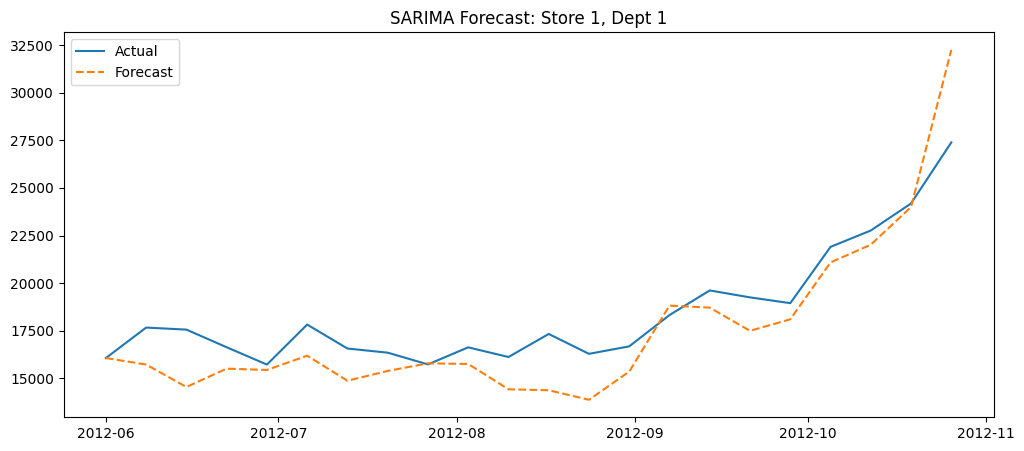

RMSE: 1788.64
WMAE: 1252.99


In [79]:
# Align forecast index with y_test
forecast = pd.Series(forecast.values, index=y_test.index)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title(f"SARIMA Forecast: Store {1}, Dept {1}")
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f"RMSE: {rmse:.2f}")

# WMAE
wmae = weighted_mae(y_test.values, forecast.values, test["IsHoliday"].values)
print(f"WMAE: {wmae:.2f}")


In [ ]:
from sklearn.metrics import mean_squared_error

all_forecasts = []
metrics_list = []

groups = df[['Store', 'Dept']].drop_duplicates().reset_index(drop=True)

for _, row in groups.iterrows():
    store = row['Store']
    dept = row['Dept']

    df_sub = df[(df['Store'] == store) & (df['Dept'] == dept)].copy()
    df_sub = df_sub.sort_values('Date').reset_index(drop=True)

    train = df_sub[df_sub['Date'] < '2012-01-01'].reset_index(drop=True)
    test = df_sub[df_sub['Date'] >= '2012-01-01'].reset_index(drop=True)

    y_log = np.log1p(train['Weekly_Sales'])
    exog_train = train[exog_cols]
    exog_test = test[exog_cols]

    try:
        model = SARIMAX(
            y_log,
            exog=exog_train,
            order=(1,0,1),
            seasonal_order=(0,1,0,52),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)

        forecast_log = results.predict(start=0, end=len(test)-1, exog=exog_test)
        forecast = np.expm1(forecast_log)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast))
        wmae = weighted_mae(test['Weekly_Sales'].values, forecast, test['IsHoliday'].values)

        # Store forecasts
        df_forecast = pd.DataFrame({
            'Store': store,
            'Dept': dept,
            'Date': test['Date'],
            'Forecast_Sales': forecast,
            'Actual_Sales': test['Weekly_Sales']
        })
        all_forecasts.append(df_forecast)

        # Store metrics
        metrics_list.append({
            'Store': store,
            'Dept': dept,
            'RMSE': rmse,
            'WMAE': wmae
        })

        print(f"Store {store}, Dept {dept} — RMSE: {rmse:.2f}, WMAE: {wmae:.2f}")

    except Exception as e:
        print(f"Failed for Store {store}, Dept {dept}: {e}")

# Combine all forecasts and metrics
final_forecast_df = pd.concat(all_forecasts).reset_index(drop=True)
metrics_df = pd.DataFrame(metrics_list)

Store 1, Dept 1 — RMSE: 15501.24, WMAE: 9157.34
Store 1, Dept 2 — RMSE: 8458.75, WMAE: 4102.56
Store 1, Dept 3 — RMSE: 11813.03, WMAE: 6197.20
Store 1, Dept 4 — RMSE: 7888.07, WMAE: 4085.47
Store 1, Dept 5 — RMSE: 9908.99, WMAE: 7370.60
Store 1, Dept 6 — RMSE: 2961.18, WMAE: 1884.92
Store 1, Dept 7 — RMSE: 3699902.56, WMAE: 486139.72
Store 1, Dept 8 — RMSE: 7118.79, WMAE: 4231.23
Store 1, Dept 9 — RMSE: 9419.73, WMAE: 6438.97
Store 1, Dept 10 — RMSE: 6481.41, WMAE: 3937.38
Store 1, Dept 11 — RMSE: 10787.52, WMAE: 6934.91
Store 1, Dept 12 — RMSE: 178701.99, WMAE: 24507.89
Store 1, Dept 13 — RMSE: 8541.74, WMAE: 4148.55
Store 1, Dept 14 — RMSE: 7995.33, WMAE: 2991.28
Store 1, Dept 16 — RMSE: 7446.55, WMAE: 5746.36
Store 1, Dept 17 — RMSE: 5014.11, WMAE: 2500.59
Store 1, Dept 18 — RMSE: inf, WMAE: 1411769290145861016164519471761316124199828857038938194593475472834606519205013772036116269145177477230761904477557378978141267785316699251008253531783168.00
Store 1, Dept 19 — RMSE: 22627482308

ValueError: DataFrame constructor not properly called!